# 머신러닝 1장(생선 분류 문제) 
### 2022.08.30(화)

In [2]:
# 도미 데이터
bream_length =	[25.4,	26.3,	26.5,	29.0,	29.0,	29.7,	29.7,	30.0,	30.0,	30.7,	31.0,	
31.0,	31.5,	32.0,	32.0,	32.0,	33.0,	33.0,	33.5,	33.5,	34.0,	34.0,	
34.5,	35.0,	35.0,	35.0,	35.0,	36.0,	36.0,	37.0,	38.5,	38.5,	39.5,	
41.0,	41.0]
bream_weight = [242.0,	290.0,	340.0,	363.0,	430.0,	450.0,	500.0,	390.0,	450.0,	500.0,	
475.0,	500.0,	500.0,	340.0,	600.0,	600.0,	700.0,	700.0,	610.0,	650.0,
575.0,	685.0,	620.0,	680.0,	700.0,	725.0,	720.0,	714.0,	850.0,	1000.0,
920.0,	955.0,	925.0,	975.0,	950.0]

# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
12.2, 19.7, 19.9]

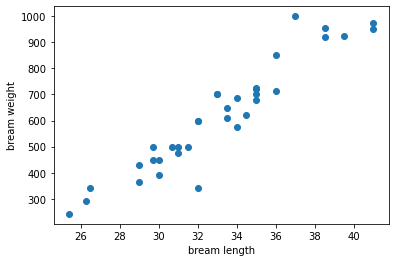

In [3]:
# 빙어 데이터 산점도 그래프
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length') # x축은 길이
plt.ylabel('bream weight') # y축은 무게
plt.show()

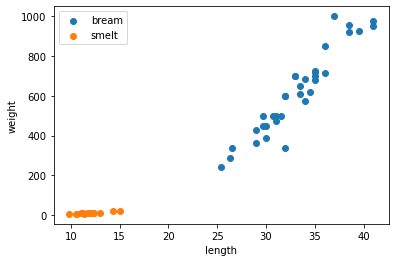

In [4]:
# 도미 데이터와 빙어 데이터 비교 (산점도)
plt.scatter(bream_length,bream_weight, label = 'bream')
plt.scatter(smelt_length,smelt_weight, label = 'smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [5]:
# 2차원 리스트로 데이터 변형
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [6]:
# 정답 데이터 준비: 도미 1, 빙어 0 
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## k-Nearest Neighbor(kNN)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


score:  1.0
(30,600) 위치 존재 예측:  [1]


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48729 (\N{HANGUL SYLLABLE BING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


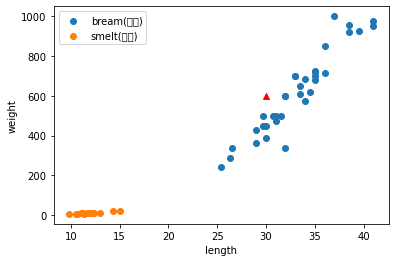

In [7]:
# KNN모델 생성
# 기본 이웃 개수: n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 모델 훈련(학습)
# fit(Training data, Target values) 함수
kn.fit(fish_data, fish_target)

# 모델 평가
# score(Test samples, Target values): 정확도의 평균값 리턴
score = kn.score(fish_data, fish_target)
print('score: ',score)

# 새로운 데이터를 활용한 결과 예측
# predict(X)
pred = kn.predict([[30,600]])
print('(30,600) 위치 존재 예측: ', pred)

import platform

if platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
elif platform.system()	==	'Darwin':	#	MacOS
    plt.rc('font',	family='AppleGothic')
else:
    plt.rc('font',	family='AppleGothic')


plt.scatter(bream_length,	bream_weight,	label='bream(도미)')
plt.scatter(smelt_length,	smelt_weight,	label='smelt(빙어)')
plt.scatter(30,	600,	marker='^',	color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [8]:
# n_neighbors 값 변경(49)
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
score = kn49.score(fish_data, fish_target)
print('모델 정확도: ', score)
print('35/49= ',35/49)

모델 정확도:  0.7142857142857143
35/49=  0.7142857142857143


### 2. 훈련 데이터 , 테스트 데이터 분리해서 사용 

In [40]:
# 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8,
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 2차원 리스트[길이, 무게]
fish_target = [1] * 35 + [0]*14 # target 값 생성

잘못된 데이터 생성
-> 랜덤하게 데이터를 분류하지 않았음.

In [48]:
# train data , test data 생성하기

#	훈련 세트 생성(35개)
train_input =	fish_data[:35]	
train_target =	fish_target[:35]
#	테스트 세트 생성(14개)
test_input =	fish_data[35:]
test_target =	fish_target[35:]

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() # 객체 생성
kn = kn.fit(train_input, train_target) # 모델 훈련
kn.score(test_input, test_target) # 테스트 세트로 평가 (정확도 출력)

0.0

### Numpy로 배열 
    • random.seed(seed) : 랜덤값 생성을 위한 초기값 지정
        – 초기값(seed)값이 같으면 동일한 랜덤값을 뽑을 수 있음
    • Numpy.arange(stop):	stop-1까지 1의 간격으로 배열 생성
        – arange:	array	range
    • random.shuffle(x):	배열 x(ndarray 타입)를 무작위로 섞음


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


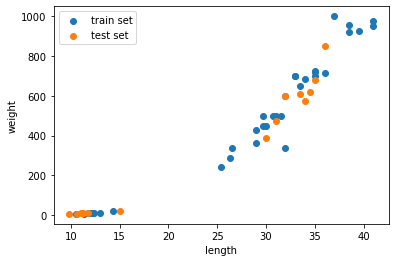

In [61]:
import numpy as np

# 배열 생성
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
# print(input_arr)
# print(input_arr.shape) # 배열의 크기 리턴


# 랜덤 배열 생성
np.random.seed(42)
index_list = np.arange(49) # 0~48까지 값을 가지는 배열 생성
print(index_list) 

np.random.shuffle(index_list) # 배열 내용을 무작위로 섞음.
print(index_list)

# 훈련세트/테스트세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]

# 훈련세트/테스트세트 데이터 확인 (산점도)
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1], label ='train set')
plt.scatter(test_input[:,0], test_input[:,1], label ='test set')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [91]:
# 머신 러닝 프로그램 생성 및 훈련
kn = kn.fit(train_input, train_target)
print("score: ", kn.score(test_input, test_target))

print("predict:     ", kn.predict(test_input))
print("test_target: ", test_target)

score:  1.0
predict:      [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
test_target:  [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


문제점 발생: 길이 25cm, 무게 150g인 도미를 빙어로 판단

• 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문   
    -스케일을 조정해야 됨: 표준점수로 변환해야 됨  
• 표준 점수: 평균과의 거리  

In [64]:
print("predict(길이 25cm, 무게 150g): ", kn.predict([[25,150]]))

predict(길이 25cm, 무게 150g):  [0]


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
train_input.shape: (36, 2) test_input.shape: (13, 2)
train_target: [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
test_target: [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


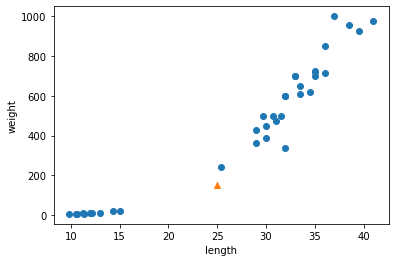

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


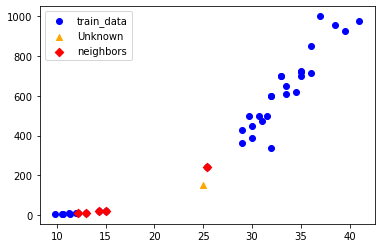

neighbors: [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
train: [[1. 0. 0. 0. 0.]]


In [92]:
# 데이터 생성 : numpy column_stack, np.ones, np.zeros 
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

# 사이킷런으로 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

# train_test_split함수 파라미터 내용(4개의 데이터셋을 리턴)
# – test_size:	0.0 ~ 1.0 사이
#  None:자동으로 25% 비율로 테스트 세트 생성
# – train_size:	0.0	~ 1.0 사이
#  None:자동으로 75% 비율로 훈련 세트 생성
# – random_state: 랜덤 시드 설정
# – stratify: target 데이터를 전달하면, 클래스 비율(0, 1)에 맞게 데이터를 나눔.

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print('train_input.shape:', train_input.shape,
        'test_input.shape:', test_input.shape  )  
print('train_target:',train_target)
print('test_target:',test_target)

# 길이 25cm, 무게 150g의 생선을 산점도로 표시
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 가장 가까운 이웃과의 거리 계산
# kn.kneighbors() : 가장 가까운 이웃 5개 찾음.
distances, indexes = kn.kneighbors([[25,150]])
print(distances)
print(indexes)

# 가장 가까운 이웃 5개 산점도로 표시
plt.scatter(train_input[:,0],train_input[:,1], label ='train_data', color ='b')
plt.scatter(25,150, marker ='^', color ='orange', label='Unknown')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D',label='neighbors',color='r')
plt.legend()
plt.show()
print('neighbors:', train_input[indexes])
print('train:', train_target[indexes])

- 스케일을 동일하게 설정

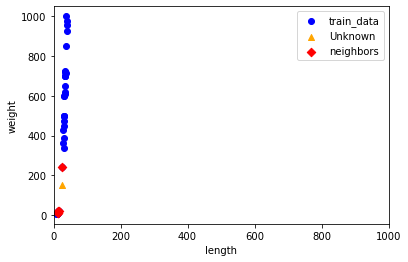

In [93]:
# Scale을 동일하게 수정 -> x축, y축의 범위를 동일하게 수정
# 길이, 무게 의 scale이 다름
# xlim(), ylim()으로 범위 지정

plt.scatter(train_input[:,0],train_input[:,1],label = 'train_data', color='b')
plt.scatter(25,150, marker='^',color ='orange', label='Unknown')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D', label='neighbors',color='r')

plt.xlim((0,1000)) # x축간격을 y축과 동일하게 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

- 데이터 전처리: 평균 및 표준편차 계산(브로드 캐스팅) -> 표준점수

length_mean weight_mean: [ 27.29722222 454.09722222]
length_std weight_std: [  9.98244253 323.29893931]
train data 표준점수 :
 [[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]]
new sample 표준점수: [-0.23012627 -0.94060693]


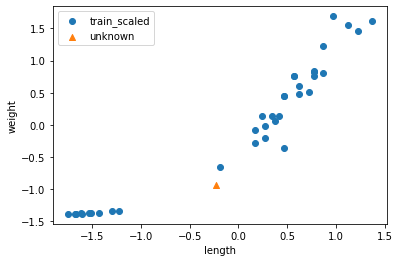

성능확인: 1.0
예측: [1.]
-----------------------------
이웃 distances: [[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
이웃 indexes: [[21 14 34 32  5]]


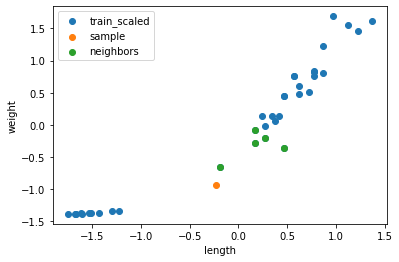

In [122]:
# 평균, 표준편차 구하기
mean = np.mean(train_input, axis=0) # axis=0 : 각 컬럼의 평균 계산
std = np.std(train_input, axis=0)
print('length_mean weight_mean:',mean)
print('length_std weight_std:',std)

# 표준점수 구하기: (특성값 - 평균 / 표준편차)
train_scaled = (train_input - mean) / std
print('train data 표준점수 :\n',train_scaled[:3])

# 표준점수로 데이터 분포 확인: 산점도
new = ([25,150] - mean) /std
print('new sample 표준점수:', new)
plt.scatter(train_scaled[:,0], train_scaled[:,1],label='train_scaled')
plt.scatter(new[0],new[1], marker='^',label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 표준점수 환산 후 knn model 훈련
kn.fit(train_scaled, train_target)

# test셋을 표준점수로 변환
test_scaled = (test_input - mean) / std
score = kn.score(test_scaled, test_target)
print('성능확인:',score)

# 표준점수로 예측
pred = kn.predict([new])
print('예측:', pred)

# 최종 이웃찾기 및 산점도
distances, indexes = kn.kneighbors([new])
print('-----------------------------')
print('이웃 distances:',distances)
print('이웃 indexes:',indexes)

plt.scatter(train_scaled[:,0],train_scaled[:,1],label='train_scaled')
plt.scatter(new[0],new[1],label='sample')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],label='neighbors')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()